## Codio Activity 8.1: Adding Nonlinear Features

**Estimated time: 60 minutes**

**Total Points: 20 Points**

This activity focuses on building polynomial models with `sklearn`.  You will fit both a standard first degree linear regression model and create a quadratic term similar to the `hp2` from video 8.2.  Using scikit-learn, you will compare the performance of the models and determine the appropriate model complexity.

## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import plotly.express as px

### The Data

For this exercise, a dataset containing data on automobiles including their horsepower and fuel economy is used.  Your goal is to build a model to predict the `mpg` column using the `horsepower` column as your models input.  Below, the dataset is loaded and a scatterplot of `horsepower` vs. `mpg` is displayed.  

In [26]:
auto = pd.read_csv('data/auto.csv')
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [27]:
px.scatter(data_frame=auto, x='horsepower', y='mpg')

In [28]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 27.7+ KB


In [29]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


[Back to top](#Index:) 

## Problem 1

### Regression with `horsepower`

**4 Points**

Below, instantiate and fit an sklearn `LinearRegression` model to predict `mpg` using the `horsepower` column.  Your model will be of the form:

$$\text{mpg} = \beta_0 + \beta_1*\text{horsepower}$$

Your model should be instantiated as `first_degree_model` below.  Assign the models mean squared error as a float to the variable `first_degree_mse` below.  

In [30]:
### GRADED

X = ''
y = ''
first_degree_model = ''
first_degree_mse = ''

### BEGIN SOLUTION
X = auto[['horsepower']]
y = auto['mpg']
first_degree_model = LinearRegression().fit(X, y)
first_degree_mse = mean_squared_error(first_degree_model.predict(X), y)
### END SOLUTION

# Answer check
print(type(first_degree_model))
print(first_degree_model.coef_)
print(first_degree_mse)

<class 'sklearn.linear_model._base.LinearRegression'>
[-0.15784473]
23.943662938603108


In [31]:
### BEGIN HIDDEN TESTS
auto_ = pd.read_csv('data/auto.csv')
X_ = auto_[['horsepower']]
y_ = auto_['mpg']
first_degree_model_ = LinearRegression().fit(X_, y_)
first_degree_mse_ = mean_squared_error(first_degree_model_.predict(X_), y_)
coefs = first_degree_model.coef_
coefs_ = first_degree_model_.coef_
#
#
#
np.testing.assert_array_equal(coefs, coefs_, err_msg=f'Coefficients are not equal, expected {coefs_}')
assert first_degree_mse_ == first_degree_mse
### END HIDDEN TESTS

[Back to top](#Index:) 

## Problem 2

### Creating quadratic feature

**4 Points**

To build a second degree or quadratic model, you will first add a new column to the data based on squaring the `horsepower` column.  Do so below, assigning the new column with the name `hp2` below. 

In [32]:
### GRADED

auto['hp2'] = ''

### BEGIN SOLUTION
auto['hp2'] = auto['horsepower']**2
### END SOLUTION

# Answer check
print(auto.shape)
print(auto.columns)

(392, 10)
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name', 'hp2'],
      dtype='object')


In [33]:
### BEGIN HIDDEN TESTS
auto_ = pd.read_csv('data/auto.csv')
auto_['hp2'] = auto['horsepower']**2
#
#
#
pd.testing.assert_frame_equal(auto, auto_)
assert set(list(auto.columns)) == set(list(auto_.columns))
### END HIDDEN TESTS

[Back to top](#Index:) 

## Problem 3

### Building a quadratic model

**4 Points**

Using both the `horsepower` and `hp2` features, fit a `LinearRegression` model using `mpg` as the target.  When creating the features, do so as a two column DataFrame in the order `horsepower, hp2`.  Assign your instantiated model to the variable `quadratic_model` below, and the models mean squared error as a float to `quad_mse` below. Note that your model will be of the form:

$$\text{mpg} = \beta_0 + \beta_1*\text{horsepower} + \beta_2*\text{hp2}$$

In [34]:
### GRADED

X = ''
y = ''
quadratic_model = ''
quad_mse = ''

### BEGIN SOLUTION
X = auto[['horsepower', 'hp2']]
y = auto['mpg']
quadratic_model = LinearRegression().fit(X, y)
quad_mse = mean_squared_error(quadratic_model.predict(X), y)
### END SOLUTION

# Answer check
print(quadratic_model.coef_)
print(quadratic_model.intercept_)
print(quad_mse)

[-0.46618963  0.00123054]
56.90009970211295
18.98476890761722


In [43]:
### BEGIN HIDDEN TESTS
auto_ = pd.read_csv('data/auto.csv')
auto_['hp2'] = auto['horsepower']**2
X_ = auto_[['horsepower', 'hp2']]
y_ = auto_['mpg']
quadratic_model_ = LinearRegression().fit(X_, y_)
quad_mse_ = mean_squared_error(quadratic_model_.predict(X_), y_)
coefs_ = quadratic_model_.coef_
coefs = quadratic_model.coef_
#
#
#
np.testing.assert_array_equal(coefs, coefs_, err_msg=f'Coefficients are not equal, expected {coefs_}')
assert quad_mse == quad_mse_
### END HIDDEN TESTS

[Back to top](#Index:) 

## Problem 4

### Plotting Predictions

**4 Points**

Because our data is not ordered by horsepower, a lineplot of `.predict(X)` would not be sensible.  To plot the correct predictions for your quadratic model, sort the two features by the `horsepower` column from least to greatest and assign this as a DataFrame to `x_for_pred` below.  Note that the resulting DataFrame should start with:

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>horsepower</th>      <th>hp2</th>    </tr>  </thead>  <tbody>    <tr>      <th>19</th>      <td>46.0</td>      <td>2116.0</td>    </tr>    <tr>      <th>101</th>      <td>46.0</td>      <td>2116.0</td>    </tr>    <tr>      <th>324</th>      <td>48.0</td>      <td>2304.0</td>    </tr>    <tr>      <th>323</th>      <td>48.0</td>      <td>2304.0</td>    </tr>    <tr>      <th>242</th>      <td>48.0</td>      <td>2304.0</td>    </tr>  </tbody></table>

In [36]:
### GRADED

x_for_pred = ''

### BEGIN SOLUTION
x_for_pred = auto[['horsepower', 'hp2']].sort_values(by = 'horsepower')
### END SOLUTION

# Answer check
print(type(x_for_pred))
x_for_pred.head()

<class 'pandas.core.frame.DataFrame'>


,horsepower,hp2
19,46.0,2116.0
101,46.0,2116.0
324,48.0,2304.0
323,48.0,2304.0
242,48.0,2304.0


In [37]:
### BEGIN HIDDEN TESTS
auto_ = pd.read_csv('data/auto.csv')
auto_['hp2'] = auto['horsepower']**2
X_ = auto_[['horsepower', 'hp2']]
y_ = auto_['mpg']
x_for_pred_ = auto_[['horsepower', 'hp2']].sort_values(by = 'horsepower')
#
#
#
assert type(x_for_pred) == type(x_for_pred_)
pd.testing.assert_frame_equal(x_for_pred, x_for_pred_)
### END HIDDEN TESTS

[Back to top](#Index:) 

## Problem 5

### Comparing the model performance

**4 Points**

Reflect on the mean squared error of the two models.  Which model more closely approximated the data -- linear or quadratic?  Assign your answer as a string to `best_model` below (`linear` or `quadratic`).  

In [38]:
### GRADED

best_model = ''

### BEGIN SOLUTION
best_model = 'quadratic'
### END SOLUTION

# Answer check
print(best_model)

quadratic


In [39]:
### BEGIN HIDDEN TESTS
best_model_ = 'quadratic'
#
#
#
assert type(best_model) == type(best_model_)
### END HIDDEN TESTS

#### Visualization and Summary

As an ungraded exercise, use `plotly` or `matplotlib` to create a scatterplot of the data alongside the quadratic model as a line plot. 

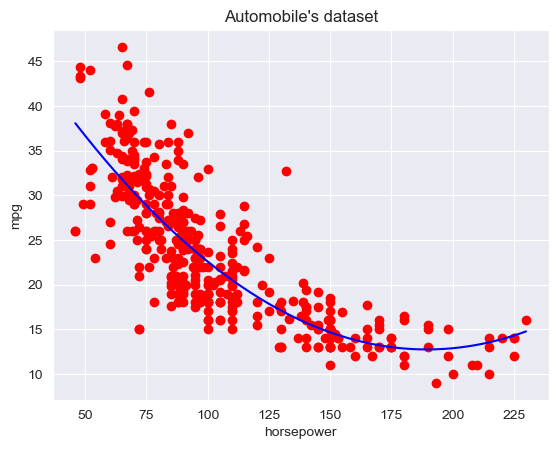

In [47]:
from sklearn.preprocessing import PolynomialFeatures
X = auto[['horsepower']].values
y = auto['mpg'].values
poly_reg=PolynomialFeatures(degree=2)
X_poly=poly_reg.fit_transform(X)

lin2_reg = LinearRegression().fit(X_poly, y)
lin2_reg.fit(X_poly,y)

X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1)

plt.scatter(X, y, color='red')
plt.plot(X_grid, lin2_reg.predict(poly_reg.fit_transform(X_grid)),color='blue')

plt.title("Automobile's dataset")
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.show()